In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ransomware-attacks/Ransomware Attacks - Ransomware Attacks.csv


In [2]:
df=pd.read_csv('/kaggle/input/ransomware-attacks/Ransomware Attacks - Ransomware Attacks.csv',index_col="#ID")
df.head(5)

,Target,AKA,description,sector,"organisation size 1,5,10,25,100,300",revenue $USD million,cost,ransom cost,data note,ransom paid,...,stock symbol,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5
#ID,,,,,,,,,,,,,,,,,,,,,
359,Kaseya,NaN,NaN,tech,300,300.0,70,70.0,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN
358,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN
357,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN
356,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN
355,Lucky Star Casino,NaN,NaN,NaN,1,9.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 359 to 1
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Target                                358 non-null    object 
 1   AKA                                   67 non-null     object 
 2   description                           184 non-null    object 
 3   sector                                351 non-null    object 
 4   organisation size 1,5,10,25,100,300   358 non-null    int64  
 5   revenue $USD million                  333 non-null    float64
 6   cost                                  358 non-null    object 
 7   ransom cost                           113 non-null    float64
 8   data note                             26 non-null     object 
 9   ransom paid                           358 non-null    object 
 10  YEAR code                             358 non-null    int64  
 11  YEAR               

In [4]:
df.columns

Index(['Target', 'AKA', 'description ', 'sector',
       'organisation size 1,5,10,25,100,300 ', 'revenue $USD million ', 'cost',
       'ransom cost', 'data note', 'ransom paid', 'YEAR code', 'YEAR', 'month',
       'location', 'interesting story (edited)', 'interesting story (long)',
       'interesting story?', 'Ransomware', 'stock symbol', 'revenue as of',
       'no of employees', 'Data Note', 'Source Name', 'URL', 'URL 2', 'URL 3',
       'URL 4', 'URL 5'],
      dtype='object')

In [5]:
mean=df['ransom cost'].mean()
median=df['ransom cost'].median()
print(f"mean: {mean} Median: {median}")

mean: 32.95446524778761 Median: 4.9


In [6]:
df.drop(columns=["AKA",'description ','data note','stock symbol','no of employees','Data Note', 'Source Name','interesting story (edited)', 'interesting story (long)',
                    'interesting story?','revenue as of','Source Name','URL 2','URL 3',"URL 4","URL 5"],inplace=True)
df.head(5)

,Target,sector,"organisation size 1,5,10,25,100,300",revenue $USD million,cost,ransom cost,ransom paid,YEAR code,YEAR,month,location,Ransomware,URL
#ID,,,,,,,,,,,,,
359,Kaseya,tech,300,300.0,70,70.0,unknown,1,2021,JUL,USA,REvil,https://techcrunch.com/2021/07/05/kaseya-hack-...
358,Salvation Army,NaN,1,NaN,unknown,NaN,unknown,1,2021,JUN,UK,unknown,https://www.teiss.co.uk/salvation-army-ransomw...
357,Grupo Fleury,healthcare,10,686.0,unknown,NaN,unknown,1,2021,JUN,Brazil,REvil,https://www.bleepingcomputer.com/news/security...
356,City of Liege,government,1,NaN,unknown,NaN,unknown,1,2021,JUN,Belgium,Ryuk,https://securityaffairs.co/wordpress/119240/ma...
355,Lucky Star Casino,NaN,1,9.0,unknown,NaN,unknown,1,2021,JUN,USA,unknown,https://www.casino.org/news/lucky-star-casinos...


In [7]:
df['ransom cost'].describe()

count    113.000000
mean      32.954465
std       87.693550
min        0.002500
25%        0.457000
50%        4.900000
75%       24.000000
max      670.000000
Name: ransom cost, dtype: float64

<Axes: >

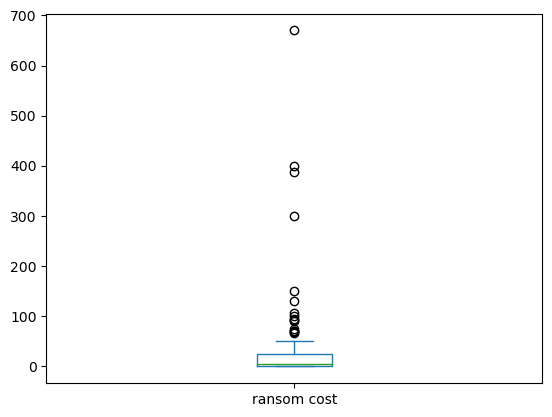

In [8]:
df['ransom cost'].plot.box()

In [9]:
from scipy.stats import trim_mean
lower=(df['ransom cost'].quantile(0.25))*1.5
upper=(df['ransom cost'].quantile(0.75))*1.5

mean=df[(df['ransom cost']>lower) & (df['ransom cost']<upper)]["ransom cost"].mean()
trimmed_mean=trim_mean(df[(df['ransom cost']>lower) & (df['ransom cost']<upper)]["ransom cost"],0.1)
print(f"mean: {mean} Trimmed Mean: {trimmed_mean}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


mean: 9.051222222222222 Trimmed Mean: 7.722499999999999


In [10]:
df['ransom cost'].isnull().sum()

245

In [11]:
df['ransom cost'].fillna(mean,inplace=True)

In [12]:
df['ransom cost'].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 359 to 1
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Target                                358 non-null    object 
 1   sector                                351 non-null    object 
 2   organisation size 1,5,10,25,100,300   358 non-null    int64  
 3   revenue $USD million                  333 non-null    float64
 4   cost                                  358 non-null    object 
 5   ransom cost                           358 non-null    float64
 6   ransom paid                           358 non-null    object 
 7   YEAR code                             358 non-null    int64  
 8   YEAR                                  358 non-null    int64  
 9   month                                 353 non-null    object 
 10  location                              358 non-null    object 
 11  Ransomware         

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 359 to 3
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Target                                321 non-null    object 
 1   sector                                321 non-null    object 
 2   organisation size 1,5,10,25,100,300   321 non-null    int64  
 3   revenue $USD million                  321 non-null    float64
 4   cost                                  321 non-null    object 
 5   ransom cost                           321 non-null    float64
 6   ransom paid                           321 non-null    object 
 7   YEAR code                             321 non-null    int64  
 8   YEAR                                  321 non-null    int64  
 9   month                                 321 non-null    object 
 10  location                              321 non-null    object 
 11  Ransomware         

In [16]:
df.isnull().sum()

Target                                  0
sector                                  0
organisation size 1,5,10,25,100,300     0
revenue $USD million                    0
cost                                    0
ransom cost                             0
ransom paid                             0
YEAR code                               0
YEAR                                    0
month                                   0
location                                0
Ransomware                              0
URL                                     0
dtype: int64

In [17]:
df.head()

,Target,sector,"organisation size 1,5,10,25,100,300",revenue $USD million,cost,ransom cost,ransom paid,YEAR code,YEAR,month,location,Ransomware,URL
#ID,,,,,,,,,,,,,
359,Kaseya,tech,300,300.0,70,70.000000,unknown,1,2021,JUL,USA,REvil,https://techcrunch.com/2021/07/05/kaseya-hack-...
357,Grupo Fleury,healthcare,10,686.0,unknown,9.051222,unknown,1,2021,JUN,Brazil,REvil,https://www.bleepingcomputer.com/news/security...
353,RBA,healthcare,5,22.0,unknown,9.051222,unknown,1,2021,APR,USA,unknown,https://threatpost.com/embryology-data-breach-...
349,Town of Freeport,government,10,127.0,0.01,0.010000,refused,1,2021,JUN,USA,Avaddon,https://www.pressherald.com/2021/06/15/freepor...
348,Invenergy,energy,10,734.0,unknown,9.051222,unknown,1,2021,JUN,USA,REvil,https://www.infosecurity-magazine.com/news/rev...


In [18]:
df.nunique()

Target                                  321
sector                                   24
organisation size 1,5,10,25,100,300       6
revenue $USD million                    215
cost                                     82
ransom cost                              77
ransom paid                               4
YEAR code                                 6
YEAR                                      8
month                                    13
location                                 64
Ransomware                               56
URL                                     303
dtype: int64

In [19]:
df.dtypes

Target                                   object
sector                                   object
organisation size 1,5,10,25,100,300       int64
revenue $USD million                    float64
cost                                     object
ransom cost                             float64
ransom paid                              object
YEAR code                                 int64
YEAR                                      int64
month                                    object
location                                 object
Ransomware                               object
URL                                      object
dtype: object

In [20]:
df.describe()

,"organisation size 1,5,10,25,100,300",revenue $USD million,ransom cost,YEAR code,YEAR
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,25.953271,10022.401869,17.225365,2.249221,2019.728972
std,50.555795,33147.344504,52.941403,1.438383,1.505636
min,1.000000,0.000000,0.002500,1.000000,2014.000000
25%,5.000000,35.000000,9.051222,1.000000,2019.000000
50%,10.000000,686.000000,9.051222,2.000000,2020.000000
75%,25.000000,3600.000000,9.051222,3.000000,2021.000000
max,300.000000,399000.000000,670.000000,6.000000,2021.000000
